# Trabalho 01 | Linguagens Formais | 2022.1
## Grupo: Antônio Alves (119165931), Gabriele Jandres (119159948) e Victor Cardoso (119157174)

---




## 📍 Importações e definição de macros 


In [ ]:
import string

ERR = -1

## 📍 Funções 


In [ ]:
"""
  * Descricao: Obtem um alfabeto de entrada de um automato
  * Parametros: -
  * Retorno: O alfabeto
"""
def get_alphabet():
  alphabet = []
  print("\n********* ALFABETO *********")
  print("Digite todos os caracteres do alfabeto, um por linha: (digite caractere + enter). Digite PARAR quando terminar.")
  proceed = True

  while proceed:
    char = input()
    if char.upper() == "PARAR":
      proceed = False
    else: 
      alphabet.append(char)

  return alphabet


"""
  * Descricao: Obtem o estado inicial de um automato
  * Parametros: -
  * Retorno: O estado inicial
"""
def get_initial_state():
  print("\n********* ESTADO INICIAL *********")
  return int(input("Digite o estado inicial: \n"))


"""
  * Descricao: Obtem o conjunto de estados finais de um automato
  * Parametros: -
  * Retorno: O conjunto de estados finais
"""
def get_final_states():
  final_states = []
  print("\n********* CONJUNTO DE ESTADOS FINAIS *********")
  print("Digite todos os estados finais do automato, um por linha: (digite numero do estado + enter). Digite PARAR quando terminar.")
  proceed = True

  while proceed:
    state = input()
    if state.upper() == "PARAR":
      proceed = False
    else: 
      final_states.append(int(state))

  return final_states


"""
  * Descricao: Obtem os estados de um automato
  * Parametros: -
  * Retorno: O conjunto de estados
"""
def get_states():
  states = []
  print("\n********* CONJUNTO DE ESTADOS *********")
  print("Digite todos os estados do automato, um por linha: (digite numero do estado + enter). Digite PARAR quando terminar.")
  proceed = True

  while proceed:
      state = input()
      if state.upper() == "PARAR":
        proceed = False
      else: 
        states.append(int(state))

  return states


"""
  * Descricao: Obtem a tabela de transicao de um automato
  * Parametros: -
  * Retorno: A tabela de transicoes
"""
def get_delta(states, alphabet):
  delta = {}

  # Inicializa todas as transicoes com default ERR
  for state in states:
    for char in alphabet:
      delta[(state, char)] = ERR

  proceed = True
  print("\ns********* TRANSIÇÕES *********")

  while proceed:
    state = int(input("\nDigite o estado de origem: "))
    char = input("Digite o caractere de entrada: ")
    final_state = int(input("Digite o estado de destino: "))
    delta[(state, char)] = final_state

    choice = input("Deseja continuar inserindo? \nS - Sim \nN - Nao\n")
    if choice.upper() == 'N':
      proceed = False
  
  return delta


"""
  * Descricao: Realiza a transicao de um estado para o outro no automato
  * Parametros: A tabela de transicoes, o estado de origem e o caractere de entrada
  * Retorno: O estado de destino da transicao
"""
def transition_to_state(delta, state, char):
  return delta.get((state, char))


"""
  * Descricao: Obtem um caractere de uma palavra de entrada e atualiza a palavra removendo o primeiro caractere ja lido
  * Parametros: A palavra de entrada
  * Retorno: O caractere a ser processado e o restante da palavra de entrada
"""
def get_char(word):
  return word[0], word[1:]


"""
  * Descricao: Retorna o caractere removido do lexema a palavra de entrada
  * Parametros: Palavra de entrada e o lexema
  * Retorno: A palavra de entrada atualizada
"""
def back_char_to_entry(word, lexem):
  word = lexem[-1]
  return word


"""
  * Descricao: Remove o ultimo caractere do lexema
  * Parametros: O lexema
  * Retorno: O lexema atualizado
"""
def truncate_last_char(lexem):
  return lexem[:-1]


"""
  * Descricao: Realiza a analise lexica de uma palavra
  * Parametros: A palavra, o estado inicial, conjunto de estados finais e a tabela de transicoes de um automato
  * Retorno: Uma tupla ("Valida", lexema), se a palavra for aceita, ou "Invalida", caso contrario
"""
def lexical_analyzer(word, initial_state, final_states, table):
  state = initial_state
  lexem = ""
  stack = []
  while len(word) != 0 and state != ERR:
    char, word = get_char(word)
    lexem += char
    if state in final_states:
      stack.clear()
    stack.append(state)
    state = transition_to_state(table, state, char)

  while state not in final_states and len(stack) != 0:
    state = stack.pop()
    word = back_char_to_entry(word, lexem)
    lexem = truncate_last_char(lexem)

  if state in final_states: 
    return ("Valida", f'Lexema: {lexem}')
  else:
    return "Invalida"

"""
  * Descricao: Realiza a analise lexica de uma palavra usando o automato dado como entrada
  * Parametros: Uma palavra de entrada
  * Retorno: -
"""
def run_automata(word):
  alphabet = get_alphabet()
  states = get_states()
  initial_state = get_initial_state()
  final_states = get_final_states()
  delta = get_delta(states, alphabet)
  print(lexical_analyzer(word, initial_state, final_states, delta)) 

# 📍 Exemplo 1 


**Descrição:** Linguagem contendo todos os números de telefone celular: 9 dígitos, começando com o dígito 9.

**Expressão regular:** 9[0-9]{8}

**Autômato:**

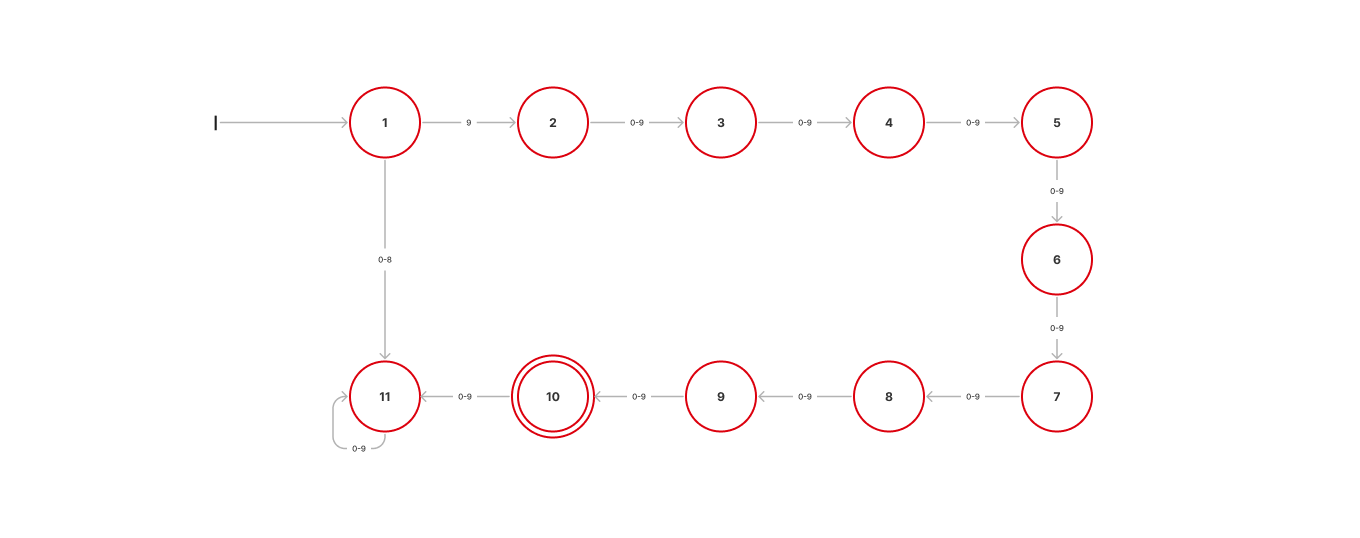

O 11º estado do autômato (sumidouro) não está representado explicitamente no código, mas todas as transições que caminham até ele vão para o estado ERR, travando o autômato.


In [ ]:
"""
  * Descricao: Realiza a analise lexica de uma palavra usando o automato que reconhece a linguagem dos numeros de telefone com 9 digitos, começando por 9
  * Parametros: Uma palavra de entrada
  * Retorno: -
"""
def run_phone_number_example(word):
  alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '9']
  initial_state = 1
  final_states = [10]
  delta = {(1, '0'): ERR, (1, '1'): ERR, (1, '2'): ERR, (1, '3'): ERR, (1, '4'): ERR, (1, '5'): ERR, (1, '6'): ERR, (1, '7'): ERR, (1, '8'): ERR, (1, '9'): 2,
           (2, '0'): 3, (2, '1'): 3, (2, '2'): 3, (2, '3'): 3, (2, '4'): 3, (2, '5'): 3, (2, '6'): 3, (2, '7'): 3, (2, '8'): 3, (2, '9'): 3, 
           (3, '0'): 4, (3, '1'): 4, (3, '2'): 4, (3, '3'): 4, (3, '4'): 4, (3, '5'): 4, (3, '6'): 4, (3, '7'): 4, (3, '8'): 4, (3, '9'): 4,
           (4, '0'): 5, (4, '1'): 5, (4, '2'): 5, (4, '3'): 5, (4, '4'): 5, (4, '5'): 5, (4, '6'): 5, (4, '7'): 5, (4, '8'): 5, (4, '9'): 5, 
           (5, '0'): 6, (5, '1'): 6, (5, '2'): 6, (5, '3'): 6, (5, '4'): 6, (5, '5'): 6, (5, '6'): 6, (5, '7'): 6, (5, '8'): 6, (5, '9'): 6,
           (6, '0'): 7, (6, '1'): 7, (6, '2'): 7, (6, '3'): 7, (6, '4'): 7, (6, '5'): 7, (6, '6'): 7, (6, '7'): 7, (6, '8'): 7, (6, '9'): 7,
           (7, '0'): 8, (7, '1'): 8, (7, '2'): 8, (7, '3'): 8, (7, '4'): 8, (7, '5'): 8, (7, '6'): 8, (7, '7'): 8, (7, '8'): 8, (7, '9'): 8,
           (8, '0'): 9, (8, '1'): 9, (8, '2'): 9, (8, '3'): 9, (8, '4'): 9, (8, '5'): 9, (8, '6'): 9, (8, '7'): 9, (8, '8'): 9, (8, '9'): 9,
           (9, '0'): 10, (9, '1'): 10, (9, '2'): 10, (9, '3'): 10, (9, '4'): 10, (9, '5'): 10, (9, '6'): 10, (9, '7'): 10, (9, '8'): 10, (9, '9'): 10,
           (10, '0'): ERR, (10, '1'): ERR, (10, '2'): ERR, (10, '3'): ERR, (10, '4'): ERR, (10, '5'): ERR, (10, '6'): ERR, (10, '7'): ERR, (10, '8'): ERR, (10, '9'): ERR
          }
  print(lexical_analyzer(word, initial_state, final_states, delta))

# 📍 Exemplo 2


**Descrição:** Linguagem contendo todas as senhas com 6 a 8 letras maiúsculas e/ou minúsculas.

**Expressão regular:** ^[a-z|A-Z]{6,8}$

**Autômato:**

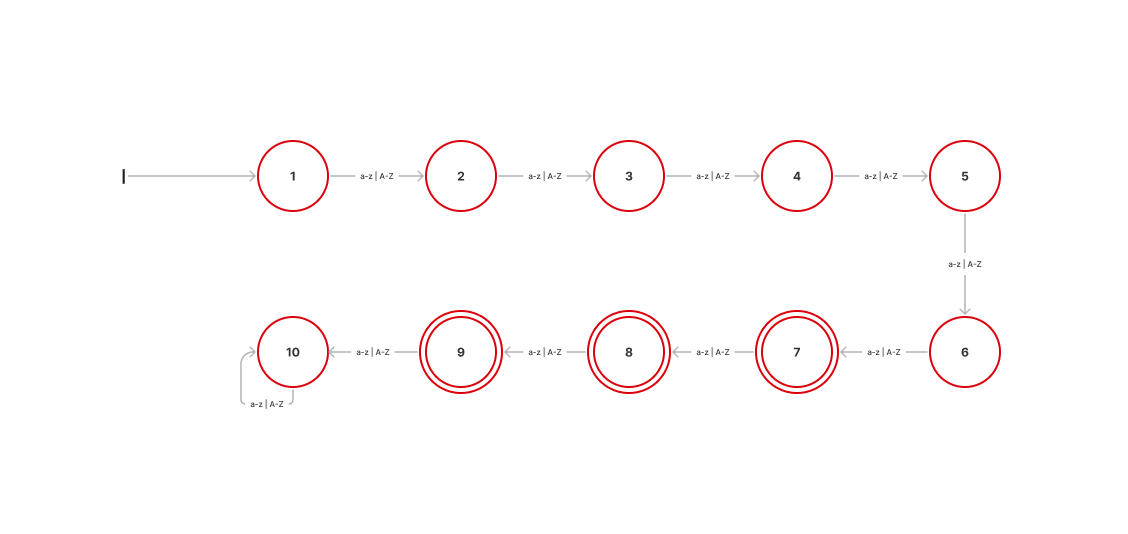

O 10º estado do autômato (sumidouro) não está representado explicitamente no código, mas todas as transições que caminham até ele vão para o estado ERR, travando o autômato.


In [ ]:
"""
  * Descricao: Realiza a analise lexica de uma palavra usando o automato que reconhece a linguagem das senhas com 6 a 8 letras maiusculas e/ou minusculas
  * Parametros: Uma palavra de entrada
  * Retorno: -
"""
def run_password_example(word):
  alphabet = list(string.ascii_lowercase) + list(string.ascii_uppercase)
  initial_state = 1
  states = [1, 2, 3, 4, 5, 6, 7, 8, 9]
  final_states = [7, 8, 9]
  delta = {}

  for state in states:
    for char in alphabet:
      if state == 9:
        delta[(state, char)] = ERR
      else:
        delta[(state, char)] = state + 1

  print(lexical_analyzer(word, initial_state, final_states, delta))

# 📍 Programa principal


Execute normalmente o programa principal, podendo escolher entre criar um novo autômato ou usar os dois autômatos de exemplo:

In [ ]:
if __name__ == '__main__':
  choice = int(input("\nVoce gostaria de inserir um novo automato ou utilizar o exemplo de automato pre salvo? \n1 - Criar novo automato \n2 - Executar com automato que reconhece a linguagem dos numeros de telefone com 9 digitos, comecando por 9 \n3 - Executar com automato que reconhece a linguagem das senhas com 6 a 8 letras maiusculas e/ou minusculas \nSua escolha:"))
  word = input("Digite uma palavra: ")

  if choice == 1:
    run_automata(word)
  elif choice == 2:
    run_phone_number_example(word)
  elif choice == 3:
    run_password_example(word)


Voce gostaria de inserir um novo automato ou utilizar o exemplo de automato pre salvo? 
1 - Criar novo automato 
2 - Executar com automato que reconhece a linguagem dos numeros de telefone com 9 digitos, comecando por 9 
3 - Executar com automato que reconhece a linguagem das senhas com 6 a 8 letras maiusculas e/ou minusculas 
Sua escolha:2
Digite uma palavra: 977564830
('Valida', 'Lexema: 977564830')
